In [1]:
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle


# The function simon_oracle (imported above) creates a Simon oracle for the bitstring b

# 1. Implement a general Simon oracle using Qiskit.

In [2]:
# Simon_Oracle

def simon_gen_oracle(b):
    # to create copies of first register to second register
    for i in range(n):
        circ.cx(i, n+i)                         #change the name of variable 'circ' depending on what you name your circuit
    
    # appying cx based on b
    k=0
    for i in range(n-1, -1, -1):                #reading the character of b in reverse order
        if b[i] == '1':                         #if there is a '1' in b, because if there is a '0' we leave it unchanged
            m = n                               #we assign the value of n to some variable m
            for j in range(n-1, -1, -1):        
                if b[j] == '1':                 #if we encounter '1' then we implement cx with respect to those b which are '1'
                    circ.cx(k, m)               
                m+=1
            break
        k+=1                                    # when the bitstring is not '1', we increment k by 1 and go to next bit
    
                

# 2. Test your general Simon oracle with the secret bitstring  b=1001, on a simulator. Are the results what you expect? Explain why.

In [3]:
n = 4
b = '1001'
circ = QuantumCircuit(n*2, n)

circ.h(range(n))
circ.barrier()

simon_gen_oracle(b)

circ.barrier()

circ.h(range(n))
circ.measure(range(n), range(n))

circ.draw()

┌───┐ ░                                ░ ┌───┐┌─┐         
q_0: ┤ H ├─░───■───────────────────■────■───░─┤ H ├┤M├─────────
     ├───┤ ░   │                   │    │   ░ ├───┤└╥┘┌─┐      
q_1: ┤ H ├─░───┼────■──────────────┼────┼───░─┤ H ├─╫─┤M├──────
     ├───┤ ░   │    │              │    │   ░ ├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─░───┼────┼────■─────────┼────┼───░─┤ H ├─╫──╫─┤M├───
     ├───┤ ░   │    │    │         │    │   ░ ├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─░───┼────┼────┼────■────┼────┼───░─┤ H ├─╫──╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │    │    │  ┌─┴─┐  │   ░ └───┘ ║  ║  ║ └╥┘
q_4: ──────░─┤ X ├──┼────┼────┼──┤ X ├──┼───░───────╫──╫──╫──╫─
           ░ └───┘┌─┴─┐  │    │  └───┘  │   ░       ║  ║  ║  ║ 
q_5: ──────░──────┤ X ├──┼────┼─────────┼───░───────╫──╫──╫──╫─
           ░      └───┘┌─┴─┐  │         │   ░       ║  ║  ║  ║ 
q_6: ──────░───────────┤ X ├──┼─────────┼───░───────╫──╫──╫──╫─
           ░           └───┘┌─┴─┐     ┌─┴─┐ ░       ║  ║  ║  ║ 
q_7: ──────░────────────────┤ X ├─────┤ X ├─░───────╫──╫──╫──╫─
           ░                └───┘     └───┘ ░       ║  ║  ║  ║ 
c: 4/═══════════════════════════════════════════════╩══╩══╩══╩═
                                                    0  1  2  3

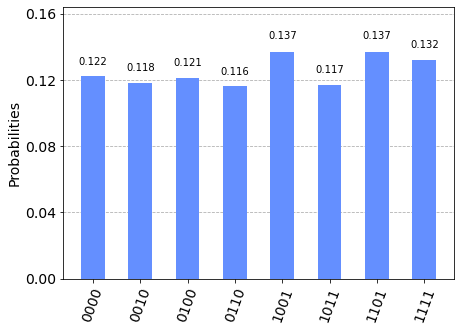

In [4]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(circ, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [5]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z), ) )

1001.0010 = 0 (mod 2)
1001.1011 = 0 (mod 2)
1001.1001 = 0 (mod 2)
1001.1111 = 0 (mod 2)
1001.0110 = 0 (mod 2)
1001.1101 = 0 (mod 2)
1001.0100 = 0 (mod 2)
1001.0000 = 0 (mod 2)


# Verify Result (With Qiskit Oracle)

In [7]:
b_1 = '1001'

n = len(b_1)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    

# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit += simon_oracle(b_1)

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw()

┌───┐ ░                                ░ ┌───┐┌─┐         
q_0: ┤ H ├─░───■───────────────────■────■───░─┤ H ├┤M├─────────
     ├───┤ ░   │                   │    │   ░ ├───┤└╥┘┌─┐      
q_1: ┤ H ├─░───┼────■──────────────┼────┼───░─┤ H ├─╫─┤M├──────
     ├───┤ ░   │    │              │    │   ░ ├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─░───┼────┼────■─────────┼────┼───░─┤ H ├─╫──╫─┤M├───
     ├───┤ ░   │    │    │         │    │   ░ ├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─░───┼────┼────┼────■────┼────┼───░─┤ H ├─╫──╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │    │    │  ┌─┴─┐  │   ░ └───┘ ║  ║  ║ └╥┘
q_4: ──────░─┤ X ├──┼────┼────┼──┤ X ├──┼───░───────╫──╫──╫──╫─
           ░ └───┘┌─┴─┐  │    │  └───┘  │   ░       ║  ║  ║  ║ 
q_5: ──────░──────┤ X ├──┼────┼─────────┼───░───────╫──╫──╫──╫─
           ░      └───┘┌─┴─┐  │         │   ░       ║  ║  ║  ║ 
q_6: ──────░───────────┤ X ├──┼─────────┼───░───────╫──╫──╫──╫─
           ░           └───┘┌─┴─┐     ┌─┴─┐ ░       ║  ║  ║  ║ 
q_7: ──────░────────────────┤ X ├─────┤ X ├─░───────╫──╫──╫──╫─
           ░                └───┘     └───┘ ░       ║  ║  ║  ║ 
c: 4/═══════════════════════════════════════════════╩══╩══╩══╩═
                                                    0  1  2  3

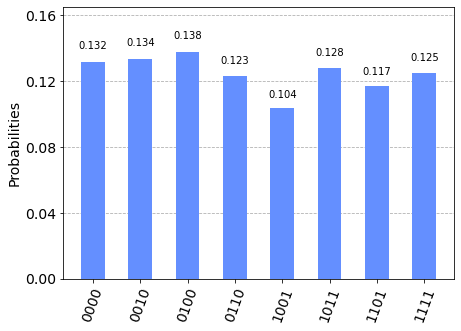

In [10]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(simon_circuit, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [11]:
# Calculate the dot product of the results
def bdotz(b_1, z):
    accum = 0
    for i in range(len(b_1)):
        accum += int(b_1[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b_1, z, bdotz(b_1,z), ) )

1001.1101 = 0 (mod 2)
1001.0100 = 0 (mod 2)
1001.0010 = 0 (mod 2)
1001.1011 = 0 (mod 2)
1001.1001 = 0 (mod 2)
1001.0110 = 0 (mod 2)
1001.1111 = 0 (mod 2)
1001.0000 = 0 (mod 2)


As we can see both the results, from our oracle and qiskit oracle are almost same.

Reference: https://www.youtube.com/watch?v=7hYQzIHhDXA